#BÀI TẬP QUÁ TRÌNH: DỰ ĐOÁN THỜI GIAN CHẠY CỦA CHƯƠNG TRÌNH

- Thực hiện: Nhóm Nopen
- Thành viên:
  - Vũ Anh Đức (19521384)
  - Châu Thiên Long (21520331)
  - Tăng Minh Hiển (21520229)
  - Nguyễn Thái Thành Long (21520334)

# Khai báo các thư viện cần thiết

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import sklearn
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Load dữ liệu train và test lần lượt từ file data.txt và data3.txt trong drive của nhóm

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
col_name = ['space', 'second']
df = pd.read_csv("/content/drive/MyDrive/CS114/PREDICT_EXECUTION_TIME/data.txt", sep = ",", header=None, names = col_name)
df_test = pd.read_csv("/content/drive/MyDrive/CS114/PREDICT_EXECUTION_TIME/data3.txt", sep = ",", header = None, names=col_name)
x = df.space
y = df.second
x_test = df_test.space
y_test = df_test.second

x = x.to_numpy()
x = x.reshape(-1,1)
x_train = x


x_test = x_test.to_numpy()
x_test = x_test.reshape(-1,1)
x_test_old = x_test

# Trực quan hóa dữ liệu train

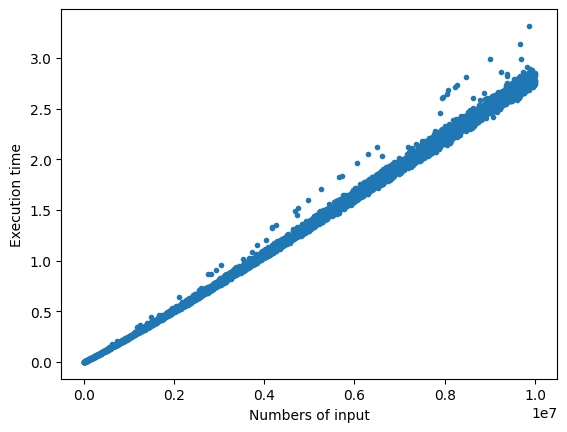

In [ ]:
plt.plot(x, y, '.')
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.show()

# Chuẩn hóa dữ liệu (Sử dụng MinMaxScaler)

In [4]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
x_test = sc.transform(x_test)

# Polynomial regression (y = w1*x^3 + w2*x^2 + w3*x + b)

Xây dụng hàm dự đoán, hàm tính giá trị hàm Loss (MSE), hàm update, hàm train

In [5]:
def predict_point(i,w1,w2,w3,b):
    return w1*(x[i]**3)+w2*(x[i]**2)+w3*x[i]+b

def MSE(w1,w2,w3,b):
    result = 0
    n=5211
    for i in range(n):
        result+= (y[i]-predict_point(i,w1,w2,w3,b))**2
    return result/n

def update(u,w1,w2,w3,b):
    w1_new=0
    w2_new=0
    w3_new=0
    b_new=0
    n=5211
    for i in range(n):
        w1_new += 2*(-y[i]+predict_point(i,w1,w2,w3,b)) * (x[i]**3)
        w2_new += 2*(-y[i]+predict_point(i,w1,w2,w3,b)) * (x[i]**2)
        w3_new += 2*(-y[i]+predict_point(i,w1,w2,w3,b)) * x[i]
        b_new += 2*(-y[i]+predict_point(i,w1,w2,w3,b))
    return w1-u*w1_new/n, w2-u*w2_new/n,w3-u*w3_new/n, b-u*b_new/n

def train(w1,w2,w3,b):
    u = 0.001
    loss=[]
    for i in range(times):
        mse=MSE(w1,w2,w3,b)
        loss.append(mse)
        if len(loss)>1:
            if loss[len(loss)-2]<mse:
                u/=10
        w1,w2,w3,b=update(u,w1,w2,w3,b)
    return w1,w2,w3,b,loss


Train model

In [15]:
times=800
time = np.arange(times)
w1=0
w2=0
w3=0
b=0
w1,w2,w3,b,list=train(w1,w2,w3,b)

Đồ thị biểu diễn giá trị của hàm Loss trong quá trình train

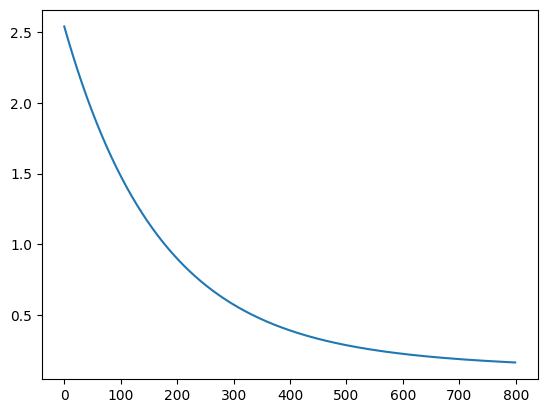

In [16]:
plt.plot(time,list)

Kết quả sau khi train

[0.40694048] [0.49561412] [0.62221635] [0.73724139]
Test set: MSE = 348.04395458799195
Training set: MSE = 0.16336789078719702


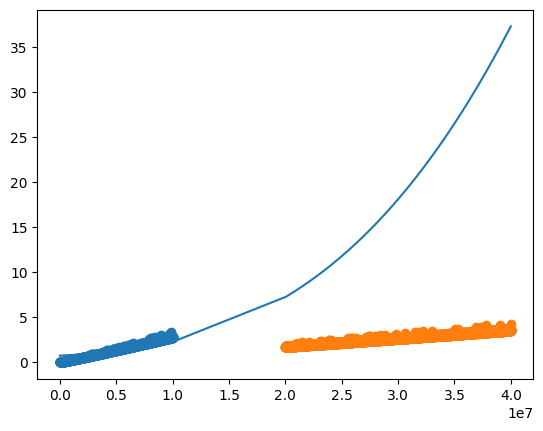

In [17]:
y_=[]
y_pred_train = []
for i in range(10590):
  y_.append(w1*(x_test[i]**3)+w2*(x_test[i]**2)+w3*x_test[i]+b)
for i in range(5211):
  y_pred_train.append(w1*(x[i]**3)+w2*(x[i]**2)+w3*x[i]+b)

print(w1,w2,w3,b)
print("Test set: MSE =",mean_squared_error(y_test, y_))
print("Training set: MSE =",mean_squared_error(y, y_pred_train))

x_plot = []
for i in x:
    x_plot.append(float(i))

for i in x_test:
    x_plot.append(float(i))
x_plot.sort()

y_plot = []
for i in x_plot:
    y_plot.append(float(w1*(i**3)+w2*(i**2)+w3*i+b))
x_plot_old = []
for i in x_train:
    x_plot_old.append(float(i))

for i in x_test_old:
    x_plot_old.append(float(i))
x_plot_old.sort()
plt.scatter(x_train,y)
plt.scatter(x_test_old,y_test)
plt.plot(x_plot_old,y_plot)

# Polynomial regression (y = w1x^2 + w2x + b)

Xây dụng hàm dự đoán, hàm tính giá trị hàm Loss (MSE), hàm update, hàm train

In [8]:
def predict_point_2(i,w1,w2,b):
    return w1*(x[i]**2)+w2*(x[i])+b

def MSE_2(w1,w2,b):
    result = 0
    n=5211
    for i in range(n):
        result+= (y[i]-predict_point_2(i,w1,w2,b))**2
    return result/n

def update_2(u,w1,w2,b):
    w1_new=0
    w2_new=0
    b_new=0
    n=5211
    for i in range(n):
        w1_new += 2*(-y[i]+predict_point_2(i,w1,w2,b)) * (x[i]**2)
        w2_new += 2*(-y[i]+predict_point_2(i,w1,w2,b)) * (x[i])
        b_new += 2*(-y[i]+predict_point_2(i,w1,w2,b))
    return w1-u*w1_new/n, w2-u*w2_new/n, b-u*b_new/n

def train_2(w1,w2,b):
    u = 0.001
    loss=[]
    for i in range(times):
        mse=MSE_2(w1,w2,b)
        loss.append(mse)
        if len(loss)>1:
            if loss[len(loss)-2]<mse:
                u/=10
        w1,w2,b=update_2(u,w1,w2,b)
    return w1,w2,b,loss

Train model

In [18]:
times=1500
time = np.arange(times)
w1=0
w2=0
b=0
w1,w2,b,list=train_2(w1,w2,b)

Đồ thị biểu diễn giá trị của hàm Loss trong quá trình train

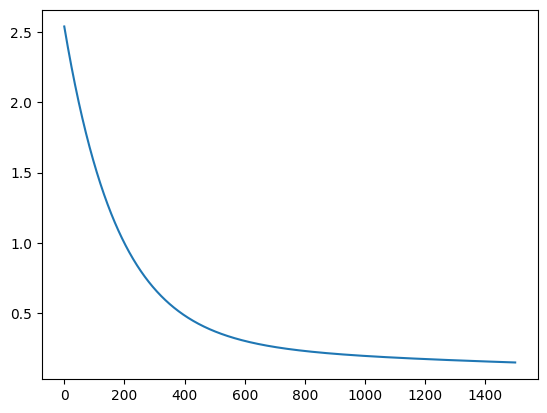

In [19]:
plt.plot(time,list)

Kết quả sau khi train

w1 = 0.7020023764467131 , w2 = 0.8330535316274589 , b = 0.7641614191020808
Test set: MSE = 57.16558794923291
Training set: MSE = 0.1490390747691777


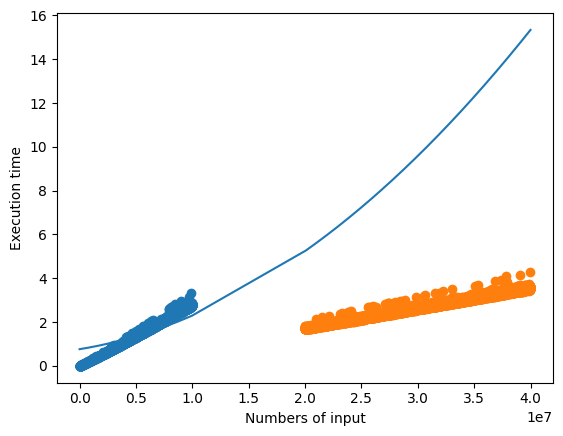

In [20]:
y_=[]
y_pred_train = []
for i in range(10590):
  y_.append(w1*(x_test[i]**2)+w2*(x_test[i])+b)
for i in range(5211):
  y_pred_train.append(w1*(x[i]**2)+w2*(x[i])+b)

print("w1 =",w1[0],", w2 =",w2[0],", b =",b[0])
print("Test set: MSE =",mean_squared_error(y_test, y_))
print("Training set: MSE =",mean_squared_error(y, y_pred_train))

x_plot = []
for i in x:
    x_plot.append(float(i))

for i in x_test:
    x_plot.append(float(i))
x_plot.sort()

y_plot = []
for i in x_plot:
    y_plot.append(float(w1*(i**2)+w2*(i)+b))
x_plot_old = []
for i in x_train:
    x_plot_old.append(float(i))

for i in x_test_old:
    x_plot_old.append(float(i))
x_plot_old.sort()
plt.scatter(x_train,y)
plt.scatter(x_test_old,y_test)
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.plot(x_plot_old,y_plot)

# Polynomial regression (y = w1*x^4 + w2*x^3 + w3*x^2 + w4*x + b)

Xây dụng hàm dự đoán, hàm tính giá trị hàm Loss (MSE), hàm update, hàm train

In [5]:
def predict_point_4(i,w1,w2,w3,w4,b):
    return w1*(x[i]**4)+w2*(x[i]**3)+w3*(x[i]**2)+w4*(x[i])+b

def MSE_4(w1,w2,w3,w4,b):
    result = 0
    n=5211
    for i in range(n):
        result+= (y[i]-predict_point_4(i,w1,w2,w3,w4,b))**2
    return result/n

def update_4(u,w1,w2,w3,w4,b):
    w1_new=0
    w2_new=0
    w3_new=0
    w4_new=0
    b_new=0
    n=5211
    for i in range(n):
        w1_new += 2*(-y[i]+predict_point_4(i,w1,w2,w3,w4,b)) * (x[i]**4)
        w2_new += 2*(-y[i]+predict_point_4(i,w1,w2,w3,w4,b)) * (x[i]**3)
        w3_new += 2*(-y[i]+predict_point_4(i,w1,w2,w3,w4,b)) * (x[i]**2)
        w4_new += 2*(-y[i]+predict_point_4(i,w1,w2,w3,w4,b)) * (x[i])
        b_new += 2*(-y[i]+predict_point_4(i,w1,w2,w3,w4,b))
    return w1-u*w1_new/n, w2-u*w2_new/n,w3-u*w3_new/n, w4-u*w4_new/n, b-u*b_new/n

def train_4(w1,w2,w3,w4,b):
    u = 0.001
    loss=[]
    for i in range(times):
        mse=MSE_4(w1,w2,w3,w4,b)
        loss.append(mse)
        if len(loss)>1:
            if loss[len(loss)-2]<mse:
                u/=10
        w1,w2,w3,w4,b=update_4(u,w1,w2,w3,w4,b)
    return w1,w2,w3,w4,b,loss

Train model

In [15]:
times=500
time = np.arange(times)
w1=0
w2=0
w3=0
w4=0
b=0
w1,w2,w3,w4,b,list=train_4(w1,w2,w3,w4,b)

Đồ thị biểu diễn giá trị của hàm Loss trong quá trình train

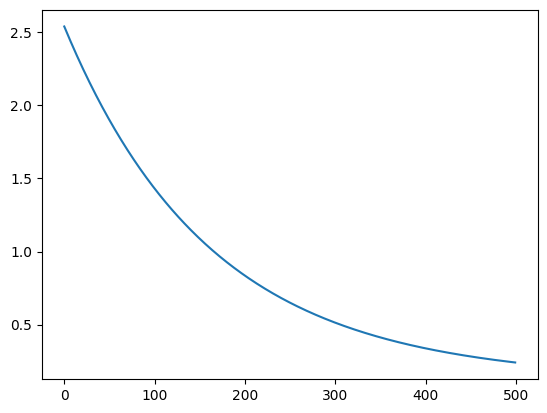

In [16]:
plt.plot(time,list)

Kết quả sau khi train

w1 = 0.2599486027143067 , w2 = 0.30967133788504964 , w3 = 0.3816621481257031 , w4 = 0.4915968457843262 , b = 0.644239087167479
Test set: MSE = 2022.3343064163312
Training set: MSE = 0.2396987296693754


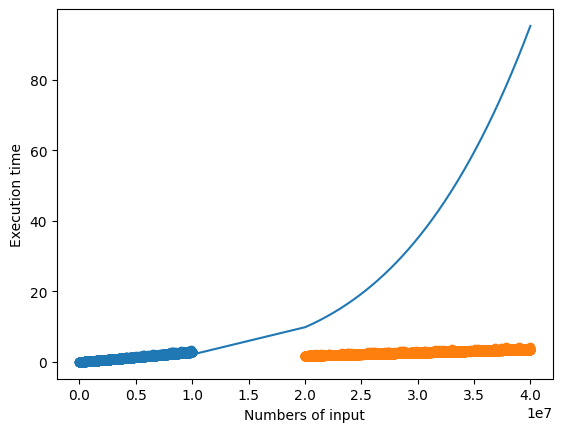

In [17]:
y_=[]
y_pred_train = []
for i in range(10590):
  y_.append(w1*(x_test[i]**4)+w2*(x_test[i]**3)+w3*(x_test[i]**2)+w4*(x_test[i])+b)
for i in range(5211):
  y_pred_train.append(w1*(x[i]**4)+w2*(x[i]**3)+w3*(x[i]**2)+w4*(x[i])+b)

print("w1 =",w1[0],", w2 =",w2[0],", w3 =",w3[0],", w4 =",w4[0],", b =",b[0])
print("Test set: MSE =",mean_squared_error(y_test, y_))
print("Training set: MSE =",mean_squared_error(y, y_pred_train))

x_plot = []
for i in x:
    x_plot.append(float(i))

for i in x_test:
    x_plot.append(float(i))
x_plot.sort()

y_plot = []
for i in x_plot:
    y_plot.append(float(w1*(i**4)+w2*(i**3)+w3*(i**2)+w4*i+b))
x_plot_old = []
for i in x_train:
    x_plot_old.append(float(i))

for i in x_test_old:
    x_plot_old.append(float(i))
x_plot_old.sort()
plt.scatter(x_train,y)
plt.scatter(x_test_old,y_test)
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.plot(x_plot_old,y_plot)

# Sử dụng Linear Regression

Chuẩn hóa dữ liệu

In [ ]:
sc = MinMaxScaler()
x_ = sc.fit_transform(x)
x_test_ = sc.transform(x_test)

Train model

In [ ]:
model = LinearRegression()
model.fit(x_, y)

LinearRegression()

Sử dụng model để dự đoán

In [ ]:
y_pred = model.predict(x_test_)

Không thực hiện chuẩn hóa dữ liệu

In [ ]:
print("MSE =",mean_squared_error(y_test, y_pred))

MSE = 35.11740589279407


Có thực hiện chuẩn hóa dữ liệu

In [ ]:
print("MSE =",mean_squared_error(y_test, y_pred))

MSE = 35.1174058927941


# Sử dụng Ridge Regression

Chuẩn hóa dữ liệu

In [ ]:
sc = MinMaxScaler()
x_ = sc.fit_transform(x)
x_test_ = sc.transform(x_test)

Không thực hiện chuẩn hóa dữ liệu

In [ ]:
alphas=np.arange(0.0, 1, 0.01)
min_MSE = 1e7
alpha_ = 0
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x, y)
    y_pred = ridge.predict(x_test)
    if mean_squared_error(y_test, y_pred) < min_MSE:
      min_MSE = mean_squared_error(y_test, y_pred)
      alpha_ = a
print("alpha =",alpha_,", MSE =",min_MSE)

alpha = 0.0 , MSE = 32.83373983377579


Có thực hiện chuẩn hóa dữ liệu

In [ ]:
alphas=np.arange(0.0, 1, 0.01)
min_MSE = 1e7
alpha_ = 0
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x_, y)
    y_pred = ridge.predict(x_test_)
    if mean_squared_error(y_test, y_pred) < min_MSE:
      min_MSE = mean_squared_error(y_test, y_pred)
      alpha_ = a
print("alpha =",alpha_,", MSE =",min_MSE)

alpha = 0.99 , MSE = 32.78157378966803


# Tăng chiều dữ liệu

Hàm tăng chiều dữ liệu

In [ ]:
def InCreaseDim(x_value):
  x = x_value
  #x = np.hstack((x, np.emath.logn(5,x_value), np.log(x_value)))
  #x = np.hstack((x, np.log10(x_value)))
  #x = np.hstack((x, x_value*np.log10(x_value)))
  #x = np.hstack((x, x_value*x_value))
  #x = np.hstack((x, np.emath.logn(5,x_value)))
  x = np.hstack((np.emath.logn(5,x_value), np.log(x_value)))
  #x = np.hstack((x, np.log(x_value)))
  return x

In [ ]:
x_ = InCreaseDim(x)
x_test_ = InCreaseDim(x_test)

Bộ train sao khi tăng số chiều

In [ ]:
x_, y

Train model

In [ ]:
model = LinearRegression()
model.fit(x_, y)

LinearRegression()

Sử dụng model dự đoán trên bộ test

In [ ]:
y_pred = model.predict(x_test_)

***Trong các đồ thị bên dưới, đường màu đỏ biểu thị kết quả dự đoán của model trên tập test***

Kết quả thí nghiệm 1:

def InCreaseDim(x_value):

    x = x_value

    x = np.hstack((x, np.log10(x_value)))

MSE của tập test = 36.87621063308658
MSE của tập train = 0.0015922458525884056


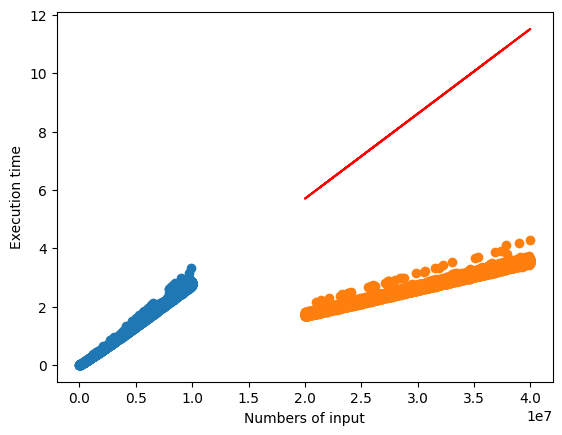

In [ ]:
y_plot = []
x_plot_old = []
y_train_pred = model.predict(x_)
print("MSE của tập test =",mean_squared_error(y_test, y_pred))
print("MSE của tập train =",mean_squared_error(y, y_train_pred))
for i in x_test_old:
    x_plot_old.append(float(i))
y_plot =  y_pred
plt.scatter(x_train,y)
plt.scatter(x_test_old,y_test)
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.plot(x_plot_old,y_plot, color='red')

Kết quả thí nghiệm 2:

def InCreaseDim(x_value):

    x = x_value

    x = np.hstack((x, np.log10(x_value)))

    x = np.hstack((x, x_value*np.log10(x_value)))

MSE của tập test = 41.78266742166697
MSE của tập train = 0.001525484675880993


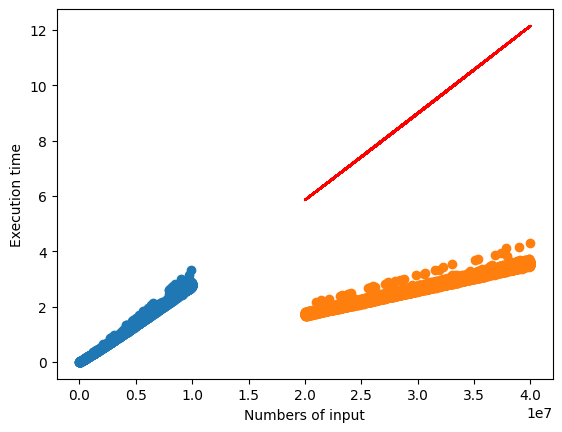

In [ ]:
y_plot = []
x_plot_old = []
y_train_pred = model.predict(x_)
print("MSE của tập test =",mean_squared_error(y_test, y_pred))
print("MSE của tập train =",mean_squared_error(y, y_train_pred))
for i in x_test_old:
    x_plot_old.append(float(i))
y_plot =  y_pred
plt.scatter(x_train,y)
plt.scatter(x_test_old,y_test)
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.plot(x_plot_old,y_plot, color='red')

Kết quả thí nghiệm 3:

def InCreaseDim(x_value):

    x = x_value

    x = np.hstack((x, np.log10(x_value)))

    x = np.hstack((x, x_value*np.log10(x_value)))

    x = np.hstack((x, x_value*x_value))

MSE của tập test = 40.18312880134708
MSE của tập train = 0.0015253117423684383


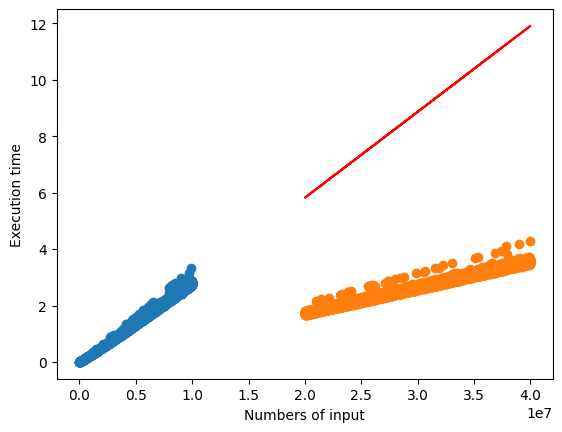

In [ ]:
print("MSE của tập test =",mean_squared_error(y_test, y_pred))
y_plot = []
x_plot_old = []
y_train_pred = model.predict(x_)
print("MSE của tập train =",mean_squared_error(y, y_train_pred))
for i in x_test_old:
    x_plot_old.append(float(i))
y_plot =  y_pred
plt.scatter(x_train,y)
plt.scatter(x_test_old,y_test)
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.plot(x_plot_old,y_plot, color='red')

Kết quả thí nghiệm 4:

def InCreaseDim(x_value):

    x = x_value

    x = np.hstack((x, np.log10(x_value)))

    x = np.hstack((x, np.emath.logn(5,x_value)))

MSE của tập test = 36.87621063308653
MSE của tập train = 0.0015922458525884056


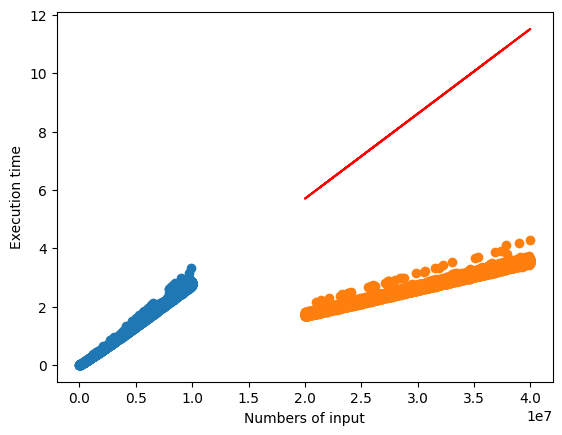

In [ ]:
y_plot = []
x_plot_old = []
y_train_pred = model.predict(x_)
print("MSE của tập test =",mean_squared_error(y_test, y_pred))
print("MSE của tập train =",mean_squared_error(y, y_train_pred))
for i in x_test_old:
    x_plot_old.append(float(i))
y_plot =  y_pred
plt.scatter(x_train,y)
plt.scatter(x_test_old,y_test)
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.plot(x_plot_old,y_plot, color='red')

Kết quả thí nghiệm 5:

def InCreaseDim(x_value):

    x = x_value

    x = np.hstack((x, np.log10(x_value)))

    x = np.hstack((x, np.log(x_value)))

MSE của tập test = 36.8762106330866
MSE của tập train = 0.0015922458525884056


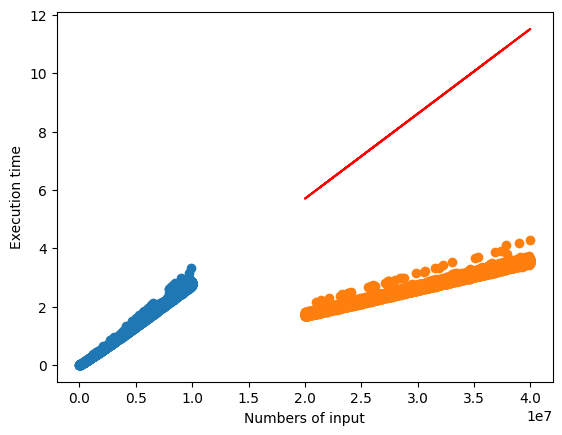

In [ ]:
y_plot = []
x_plot_old = []
y_train_pred = model.predict(x_)
print("MSE của tập test =",mean_squared_error(y_test, y_pred))
print("MSE của tập train =",mean_squared_error(y, y_train_pred))
for i in x_test_old:
    x_plot_old.append(float(i))
y_plot =  y_pred
plt.scatter(x_train,y)
plt.scatter(x_test_old,y_test)
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.plot(x_plot_old,y_plot, color='red')

Kết quả thí nghiệm 6:

def InCreaseDim(x_value):

    x = x_value

    x = np.hstack((x, np.emath.logn(5,x_value), np.log(x_value)))

MSE của tập test = 36.87621063308656
MSE của tập train = 0.0015922458525884056


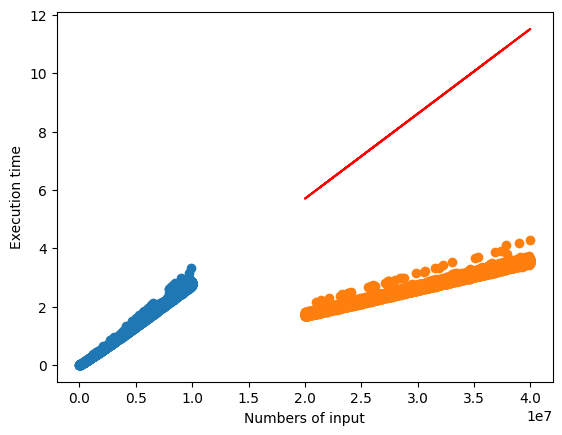

In [ ]:
y_plot = []
x_plot_old = []
y_train_pred = model.predict(x_)
print("MSE của tập test =",mean_squared_error(y_test, y_pred))
print("MSE của tập train =",mean_squared_error(y, y_train_pred))
for i in x_test_old:
    x_plot_old.append(float(i))
y_plot =  y_pred
plt.scatter(x_train,y)
plt.scatter(x_test_old,y_test)
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.plot(x_plot_old,y_plot, color='red')

Kết quả thí nghiệm 7:

def InCreaseDim(x_value):

    x = x_value

    x = np.hstack((np.emath.logn(5,x_value), np.log(x_value)))

MSE của tập test = 0.19101033162766407
MSE của tập train = 0.1861718317804998


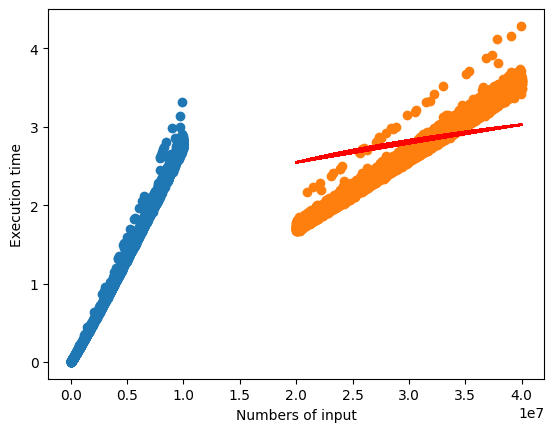

In [ ]:
y_plot = []
x_plot_old = []
y_train_pred = model.predict(x_)
print("MSE của tập test =",mean_squared_error(y_test, y_pred))
print("MSE của tập train =",mean_squared_error(y, y_train_pred))
for i in x_test_old:
    x_plot_old.append(float(i))
y_plot =  y_pred
plt.scatter(x_train,y)
plt.scatter(x_test_old,y_test)
plt.xlabel('Numbers of input')
plt.ylabel('Execution time')
plt.plot(x_plot_old,y_plot, color='red')

# Tổng kết

***Tăng chiều dữ liệu:***

    Thí nghiệm 1: MSE = 36.87621063308658
    Thí nghiệm 2: MSE = 41.78266742166697
    Thí nghiệm 3: MSE = 40.18312880134708
    Thí nghiệm 4: MSE = 36.87621063308653
    Thí nghiệm 5: MSE = 36.8762106330866
    Thí nghiệm 6: MSE = 36.87621063308656
    Thí nghiệm 7: MSE = 0.19101033162766407

***Sử dụng Linear Regression:***

      Trường hợp có chuẩn hóa dữ liệu: MSE = 35.1174058927941
      Trường hợp không chuẩn hóa dữ liệu: MSE = 35.11740589279407

***Sử dụng Ridge Regression:***

      Trường hợp có chuẩn hóa dữ liệu: MSE = 32.78157378966803 (alpha = 0.99)
      Trường hợp không chuẩn hóa dữ liệu: MSE = 32.83373983377579 (alpha = 0.0)

*Các cách làm phía dưới đều có chuẩn hóa dữ liệu*

***Sử dụng hàm bậc 2:***

      Với số epoch = 150, learning rate = 0.001
      --> Test set: MSE = 0.05002629474328356
          Training set: MSE = 1.2412211791367227
      Với số epoch = 300, learning rate = 0.001
      --> Test set: MSE = 4.134667989612923
          Training set: MSE = 0.6734010311776524
      Với số epoch = 500, learning rate = 0.001
      --> Test set: MSE = 14.444109179906137
          Training set: MSE = 0.3709603966081004
      Với số epoch = 1500, learning rate = 0.001
      --> Test set: MSE = 57.16558794923291
          Training set: MSE = 0.1490390747691777

***Sử dụng hàm bậc 3:***

      Với số epoch = 100, learning rate = 0.001     
      --> Test set: MSE = 7.289768871017223
          Training set: MSE = 1.482993691478339
      Với số epoch = 200, learning rate = 0.001     
      --> Test set: MSE = 45.43452003423865
          Training set: MSE = 0.8982730517464717
      Với số epoch = 500, learning rate = 0.001     
      --> Test set: MSE = 209.4641254577581
          Training set: MSE = 0.2857401366339945
      Với số epoch = 800, learning rate = 0.001     
      --> Test set: MSE = 348.04395458799195
          Training set: MSE = 0.16336789078719702

***Sử dụng hàm bậc 4:***

      Với số epoch = 50, learning rate = 0.001
      --> Test set: MSE = 31.083743714089525
          Training set: MSE = 1.8999566052502006
      Với số epoch = 100, learning rate = 0.001
      --> Test set: MSE = 157.00309486178577
          Training set: MSE = 1.4308283359653948
      Với số epoch = 200, learning rate = 0.001
      --> Test set: MSE = 573.8378407790675
          Training set: MSE = 0.8345886149937499
      Với số epoch = 500, learning rate = 0.001
      --> Test set: MSE = 2022.3343064163312
          Training set: MSE = 0.2396987296693754


***Nhận xét***

- Sử dụng hàm bậc 2 (Số epoch = 150, learning rate = 0.001) nhận được kết quả tốt nhất (MSE = 0.05002629474328356).

- Tiếp đến là sử dụng cách tăng chiều dữ liệu theo thí nghiệm 7 cũng sẽ cho kết quả rất tốt (MSE = 0.19101033162766407).

- Ngoài ra có thể sử dụng hàm bậc 3 (Số epoch = 100, learning rate = 0.001: MSE = 7.289768871017223).

- Các cách khác đều cho kết quả tương đối cao (MSE > 30).
- Khi sử dụng Polynomial regression (bậc 2, 3, 4), nếu chấp nhận việc model có MSE ở tập train cao thì sẽ nhận được kết quả MSE thấp ở tập test. Sử dụng hàm bậc 2 với learning rate 0.001 và số epoch lần lượt bằng 150, 300, 500 sẽ cho kết quả tốt (MSE < 30).

- Khi sử dụng Linear Regression và Ridge Regression, việc chuẩn hóa dữ liệu không tác động quá nhiều đến kết quả.

# References

https://github.com/dxmai/CS114.L21.KHCL/blob/main/Colab/Linear_Regression.ipynb

https://www.kaggle.com/code/dssant85/linear-regression-with-logarithmic-transformation/notebook

https://machinelearningcoban.com/2016/12/28/linearregression/

https://github.com/lphuong304/CS114.L21/blob/main/COLAB_ASSIGNMENTS/COLAB_ASSIGNMENTS_26_04_2021.ipynb